Importing libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import re
import string
from nltk.corpus import stopwords

Importing dataset

In [102]:
df_fake=pd.read_csv("Fake.csv")
df_real=pd.read_csv("Real.csv")

In [103]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [104]:
#No. of rows and columns in df_fake
df_fake.shape

(23481, 4)

In [105]:
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [106]:
#No. of rows and columns in df_real
df_real.shape

(21417, 4)

Inserting column "class" as target feature

In [107]:
df_fake["class"]=0  #0 for fake news
df_real["class"]=1  #1 for real news

Merging fake and real dataframes

In [108]:
#df_news is the merged dataframe
df_news=pd.concat([df_fake,df_real], axis=0)
df_news.to_csv("News.csv")

In [109]:
df_news.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [110]:
#No. of rows and columns in df_news
df_news.shape

(44898, 5)

Removing unnecessary columns

In [111]:
df=df_news.drop(["title","subject","date"], axis=1)

Shuffling the dataframe

In [112]:
df=df.sample(frac=1)

Resetting index 

In [113]:
df.reset_index(inplace=True)

In [114]:
df.drop(["index"], axis=1, inplace=True)

Final dataframe

In [115]:
df.head()

,text,class
0,"In 2017, Kelli O Brien, the aunt of Joshua Boy...",0
1,The hacker Guccifer 2.0 released more DNC e-ma...,0
2,NEW YORK (Reuters) - The U.S. House of Represe...,1
3,21st Century Wire says Our weekly documentary ...,0
4,"MANILA (Reuters) - Mutual praise, warm handsha...",1


In [116]:
df.shape

(44898, 2)

Check for missing values

In [117]:
#No missing values
df.isnull().sum()

text     0
class    0
dtype: int64

More information

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   class   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [119]:
df.describe()

,class
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Frequency of fake and real news

In [120]:
df["class"].value_counts()

0    23481
1    21417
Name: class, dtype: int64

Data visualisation

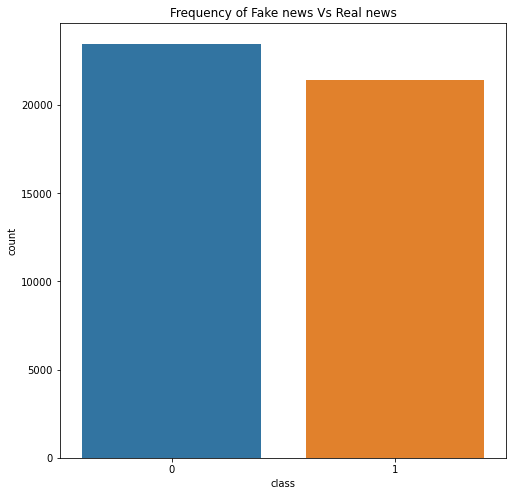

In [121]:
#countplot
plt.figure(figsize=(8,8))
sns.countplot(data=df, x="class")
plt.title("Frequency of Fake news Vs Real news")
plt.show()

Fake news is more than the real news in the dataset

Data Cleaning and pre-processing

In [122]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanyadureja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [123]:
#insignificant words in the text
stop_words=set(stopwords.words("english"))

In [124]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [125]:
#import SnowballStemmer
stemmer=nltk.SnowballStemmer("english")

In [126]:
stemmer

In [127]:
def clean_data(text):
    text=str(text).lower()
    text=re.sub("https?://\S+|www\.S+","",text)
    text=re.sub("\[.*?\]","",text)
    text=re.sub("<.*?>+","",text)
    text=re.sub("[%s]" %re.escape(string.punctuation),"",text)
    text=re.sub("\n","",text)
    text=re.sub("\w*\d\W*","",text)
    
    #Removal of stop words
    text=[word for word in text.split(" ") if word not in stop_words]
    text=" ".join(text)
    
    #Stemming the words
    text=[stemmer.stem(word) for word  in text.split(" ")]
    text=" ".join(text)
    
    return text

In [128]:
df.loc[:, "text"] = df["text"].apply(clean_data)

In [129]:
df["text"].head()

0    kelli brien aunt joshua boyl spoke public kidn...
1    hacker guccif releas dnc email overnight reall...
2    new york reuter  us hous repres committe natur...
3    st centuri wire say week documentari screen cu...
4    manila reuter  mutual prais warm handshak even...
Name: text, dtype: object

Defining dependent and independent variables

In [130]:
X=df["text"]
y=df.iloc[:,-1] #class

In [131]:
X.head()

0    kelli brien aunt joshua boyl spoke public kidn...
1    hacker guccif releas dnc email overnight reall...
2    new york reuter  us hous repres committe natur...
3    st centuri wire say week documentari screen cu...
4    manila reuter  mutual prais warm handshak even...
Name: text, dtype: object

In [132]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: class, dtype: int64

Training and testing

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Convert text into numerical feature vectors

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [135]:
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [136]:
X_train

<30081x145501 sparse matrix of type '<class 'numpy.float64'>'
	with 4552228 stored elements in Compressed Sparse Row format>

In [137]:
X_test

<14817x145501 sparse matrix of type '<class 'numpy.float64'>'
	with 2225629 stored elements in Compressed Sparse Row format>

In [138]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [140]:
lr.fit(X_train, y_train)

LogisticRegression()

In [141]:
y_pred_lr=lr.predict(X_test)

In [142]:
y_pred_lr

array([1, 1, 0, ..., 0, 0, 0])

In [143]:
score_lr=accuracy_score(y_test, y_pred_lr)

In [156]:
accuracy_lr=round(score_lr*100,2)
print("Accuracy of LR:",accuracy_lr,"%")

Accuracy of LR: 98.51 %


In [145]:
matrix_lr=confusion_matrix(y_test, y_pred_lr)
matrix_lr

array([[7613,  128],
       [  93, 6983]])

In [146]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7741
           1       0.98      0.99      0.98      7076

    accuracy                           0.99     14817
   macro avg       0.98      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



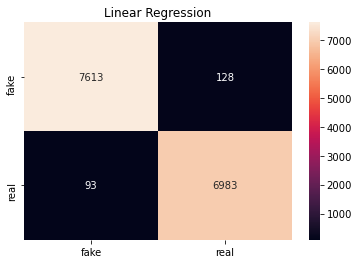

In [147]:
#heatmap of LR
axis_labels=["fake","real"]
sns.heatmap(data=matrix_lr,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='g')
plt.title("Linear Regression")
plt.show()

DecisionTreeClassifier

In [151]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [152]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [153]:
y_pred_dt=dt.predict(X_test)

In [154]:
y_pred_dt

array([1, 1, 0, ..., 0, 0, 0])

In [157]:
score_dt=accuracy_score(y_test, y_pred_dt)
accuracy_dt=round(score_dt*100,2)
print("Accuracy of DT:",accuracy_dt,"%")

Accuracy of DT: 99.78 %


In [158]:
matrix_dt=confusion_matrix(y_test, y_pred_lr)
matrix_dt

array([[7613,  128],
       [  93, 6983]])

In [159]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7741
           1       1.00      1.00      1.00      7076

    accuracy                           1.00     14817
   macro avg       1.00      1.00      1.00     14817
weighted avg       1.00      1.00      1.00     14817



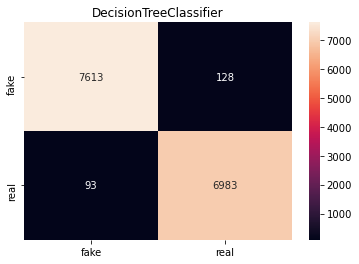

In [160]:
#heatmap of DT
axis_labels=["fake","real"]
sns.heatmap(data=matrix_dt,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='g')
plt.title("DecisionTreeClassifier")
plt.show()

DecisionTreeClassifier has a higher accuracy score than Logistic Regression

Model Testing

In [164]:
def label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def test(news):
    sample_news= {"text":[news]}
    new_test = pd.DataFrame(sample_news)
    new_test["text"] = new_test["text"].apply(clean_data) 
    new_x_test = new_test["text"]
    new_xv_test = tfidf.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_dt= dt.predict(new_xv_test)
    return (label(pred_lr[0]) label(pred_dt[0]))


In [171]:
sample_1="SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of steady growth triggered by a flurry of massive government contracts, OAS was ensnared in Operation Car Wash which unearthed an illegal contracting ring between state firms and builders. The ensuing scandal helped topple former Brazilian President Dilma Rousseff last year. Trained as an engineer, Mata Pires founded OAS with two colleagues in 1976 to do sub-contracting work for larger rival Odebrecht SA - the biggest of the builders involved in the probe.  Before the scandal, Forbes magazine estimated Mata Pires  fortune at $1.6 billion. He dropped off the magazine s billionaire list in 2015, months after OAS sought bankruptcy protection after the Car Wash scandal. While Mata Pires was never accused of wrongdoing in the investigations, creditors demanded he and his family stay away from the builder s day-to-day operations, people directly involved in the negotiations told Reuters at the time. He is survived by his wife and his two sons. "
print("Logistic Regression, DecisionTreeClassifier")
test(sample_1)

Logistic Regression, DecisionTreeClassifier


('Real News', 'Real News')

In [172]:
sample_2="Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, and CBS. Yet, these corporations function under many different brands, such as FOX, ABC, CNN, Comcast, Wall Street Journal, etc, giving people the perception of choice   As Tavistock s researchers showed, it was important that the victims of mass brainwashing not be aware that their environment was being controlled; there should thus be a vast number of sources for information, whose messages could be varied slightly, so as to mask the sense of external control. ~ Specialist of mass brainwashing, L. WolfeNew Brainwashing Tactic Called AstroturfWith alternative media on the rise, the propaganda machine continues to expand. Below is a video of Sharyl Attkisson, investigative reporter with CBS, during which she explains how  astroturf,  or fake grassroots movements, are used to spin information not only to influence journalists but to sway public opinion. Astroturf is a perversion of grassroots. Astroturf is when political, corporate or other special interests disguise themselves and publish blogs, start facebook and twitter accounts, publish ads, letters to the editor, or simply post comments online, to try to fool you into thinking an independent or grassroots movement is speaking. ~ Sharyl Attkisson, Investigative ReporterHow do you separate fact from fiction? Sharyl Attkisson finishes her talk with some insights on how to identify signs of propaganda and astroturfing  These methods are used to give people the impression that there is widespread support for an agenda, when, in reality, one may not exist. Astroturf tactics are also used to discredit or criticize those that disagree with certain agendas, using stereotypical names such as conspiracy theorist or quack. When in fact when someone dares to reveal the truth or questions the  official  story, it should spark a deeper curiosity and encourage further scrutiny of the information.This article (Journalist Reveals Tactics Brainwashing Industry Uses to Manipulate the Public) was originally created and published by Waking Times and is published here under a Creative Commons license with attribution to Vic Bishop and WakingTimes.com. It may be re-posted freely with proper attribution, author bio, and this copyright statement. READ MORE MSM PROPAGANDA NEWS AT: 21st Century Wire MSM Watch Files."
print("Logistic Regression, DecisionTreeClassifier")
test(sample_2)

Logistic Regression, DecisionTreeClassifier


('Fake News', 'Fake News')